# Exploratory Data Analysis

In [1]:
#探索性数据分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("Telco_Customer_Churn_Survival_Analysis.csv")
df.head()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value
0,0002-ORFBO,Female,No,Yes,No,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No,0
1,0003-MKNFE,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No,0
2,0004-TLHLJ,Male,No,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,1
3,0011-IGKFF,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,1
4,0013-EXCHZ,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes,1


In [3]:
df.shape

(7043, 22)

In [4]:
df.isna().sum()

CustomerID           0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Label          0
Churn_Value          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure_Months      7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Multiple_Lines     7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

## Data Preprocess

In [6]:
##数据预处理
df.drop(['CustomerID','Churn_Label'], axis = 1, inplace= True)

df.Total_Charges = df.Total_Charges.replace(" ",np.nan)
df.Total_Charges.fillna(0, inplace = True)
df.Total_Charges = df.Total_Charges.astype(float)

df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Female,No,Yes,No,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0
1,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0
2,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1
3,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1
4,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1


In [7]:
df.isna().sum()

Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
dtype: int64

In [8]:
##定义绘图函数
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (12,8))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["lightgray", "steelblue"])
    ax.xaxis.set_tick_params(rotation=0,labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_xlabel(group,fontproperties='Times New Roman', size=20)
    ax.set_ylabel('Churn Percentage',fontproperties='Times New Roman', size=20,weight='bold')

### Gender, Senior Citizen, Partner, Dependents

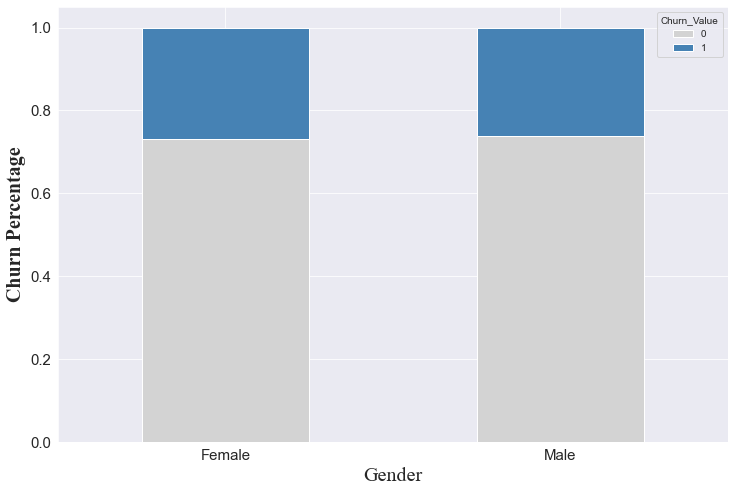

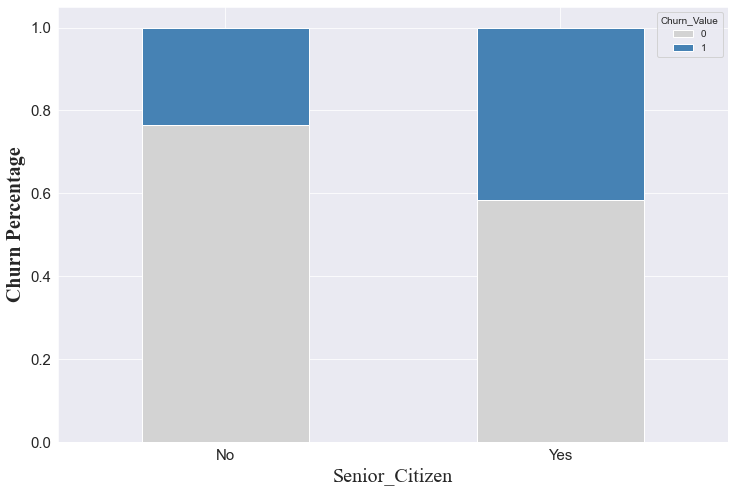

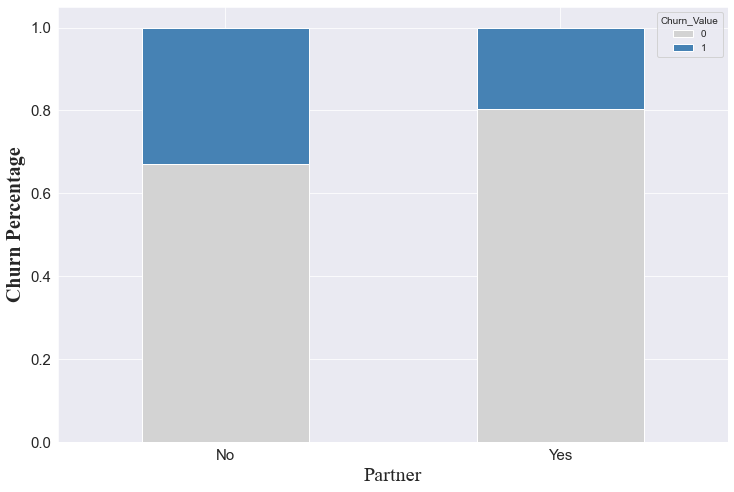

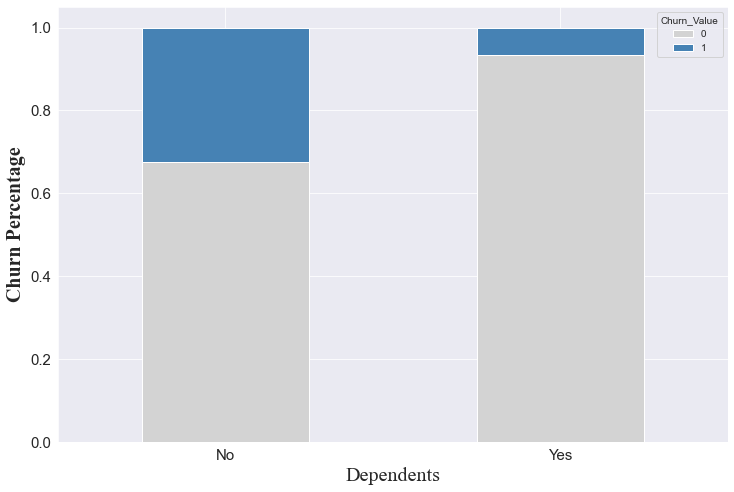

In [9]:
##Gender, Senior Citizen, Partner, Dependents
stacked_plot(df, "Gender", "Churn_Value")
stacked_plot(df, "Senior_Citizen", "Churn_Value")
stacked_plot(df, "Partner", "Churn_Value")
stacked_plot(df, "Dependents", "Churn_Value")

结论：
- 性别没有显著区别
- 老年人更容易成为流失客户
- 一个人独居更容易成为流失客户

### Tenure Months

In [10]:
##Tenure Months
df['Tenure_Months'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure_Months, dtype: float64

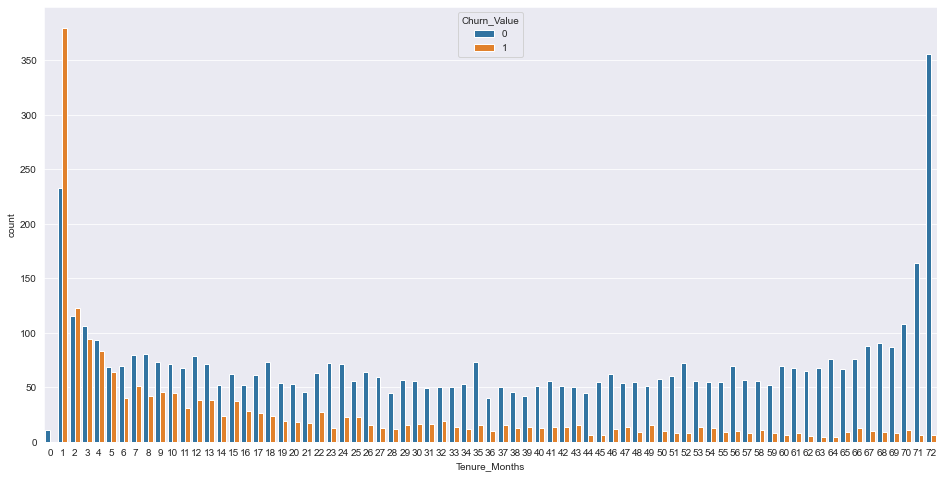

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(x="Tenure_Months", hue="Churn_Value", data=df)
plt.show()

In [12]:
def Tenure_Months(t):
    if t<=6:
        return '0.5 year'
    elif t>6 and t<=24:
        return '2 year'
    elif t>24 and t<=36:
        return '3 year'
    elif t>36 and t<=48:
        return '4 year'
    elif t>48 and t<=60:
        return '5 year'
    else:
        return '6 year'

df["Tenure Months_Group"]=df["Tenure_Months"].apply(lambda x: Tenure_Months(x))

In [13]:
df["Tenure Months_Group"].value_counts()

2 year      1729
0.5 year    1481
6 year      1407
3 year       832
5 year       832
4 year       762
Name: Tenure Months_Group, dtype: int64

<AxesSubplot:xlabel='Tenure Months_Group', ylabel='count'>

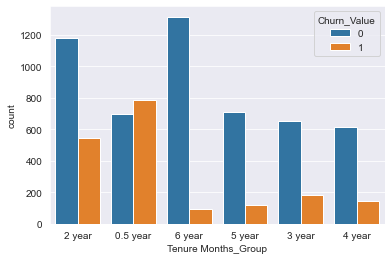

In [14]:
sns.countplot(x="Tenure Months_Group", hue="Churn_Value", data=df)

结论：
- 用户在使用电信服务前6个月（尤其是第一个月）时及其容易流失
- 用户使用电信服务超过70个月则流失率较低

### Phone Service and MultipleLines 

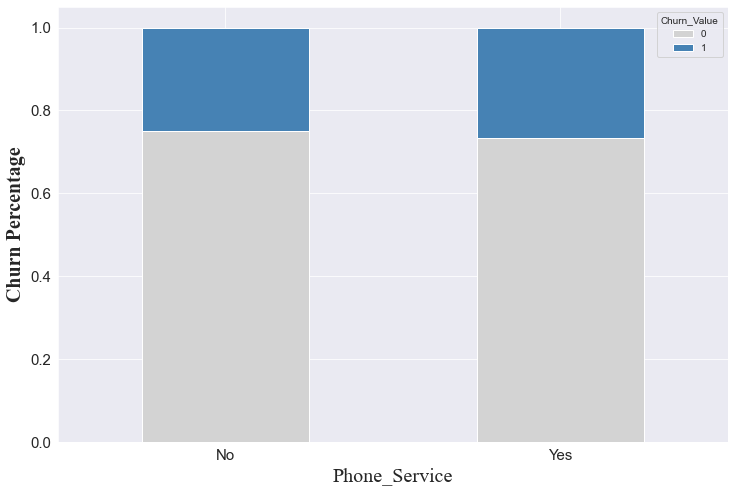

In [15]:
##Phone Service and MultipleLines
stacked_plot(df, "Phone_Service", "Churn_Value")

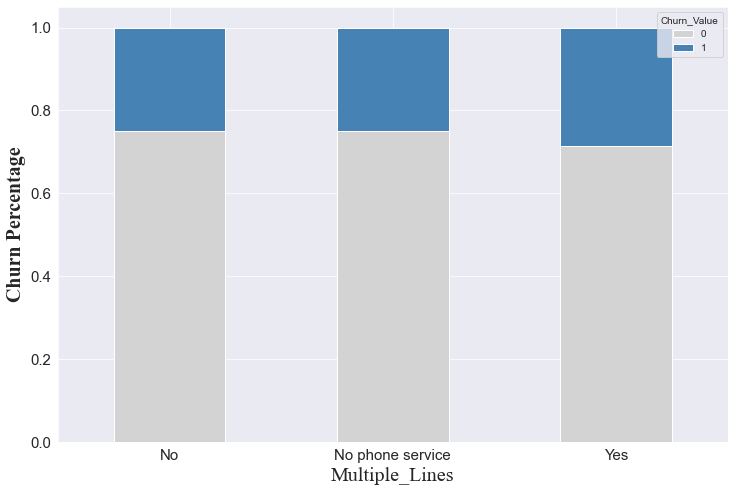

In [16]:
stacked_plot(df, "Multiple_Lines", "Churn_Value")

结论：
- 是否有电话服务不能显著区分
- 有多线路的用户流失率更高，但并不显著

### Internet Service

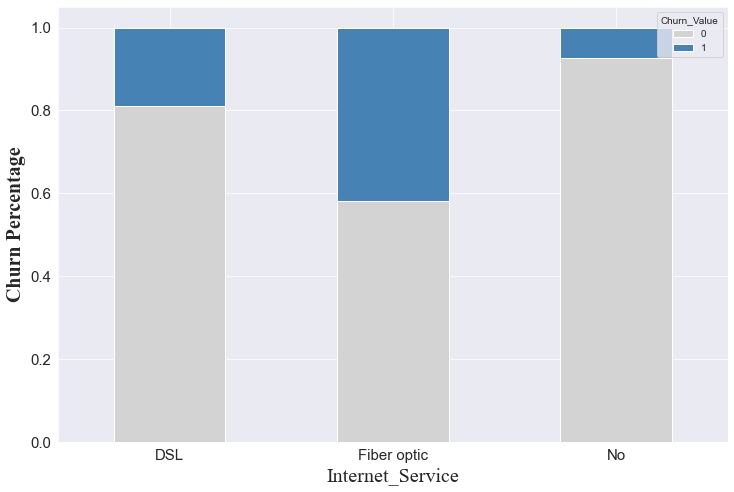

In [17]:
##Internet Service
stacked_plot(df, "Internet_Service", "Churn_Value")

结论：
- 购买光纤服务的用户比购买DSL服务的用户更容易流失

备注：DSL、网线、光纤均为宽带连接访问Internet的方式

### Internet Service（YES）：Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies

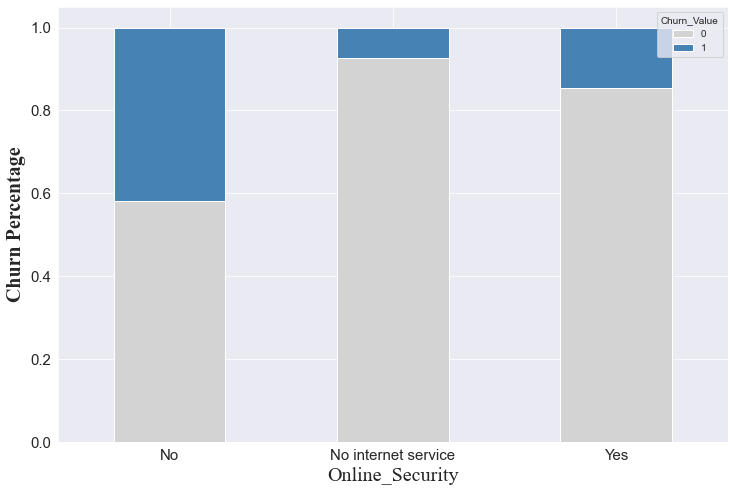

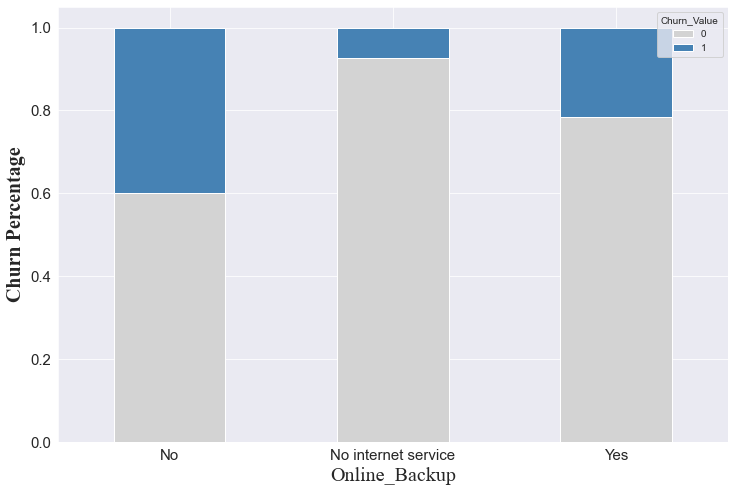

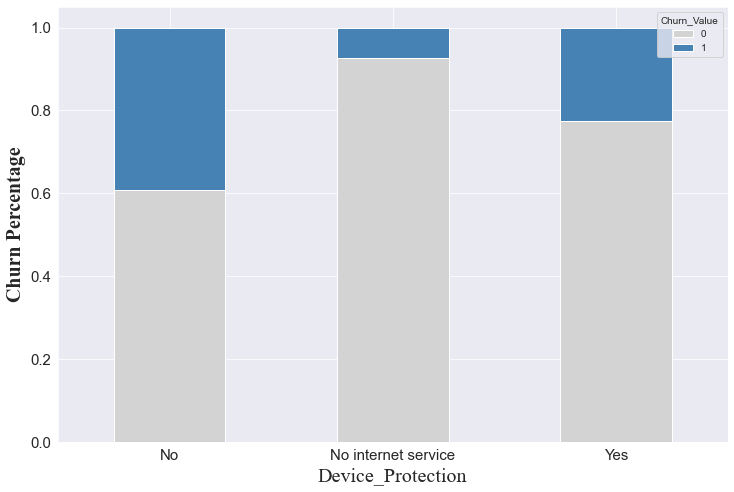

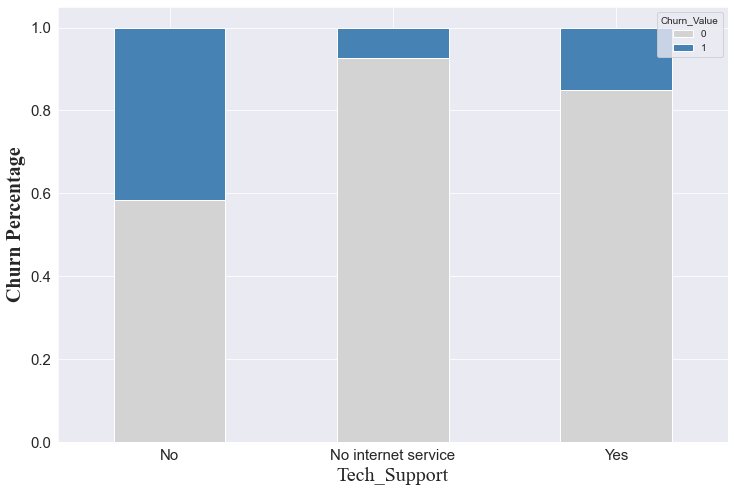

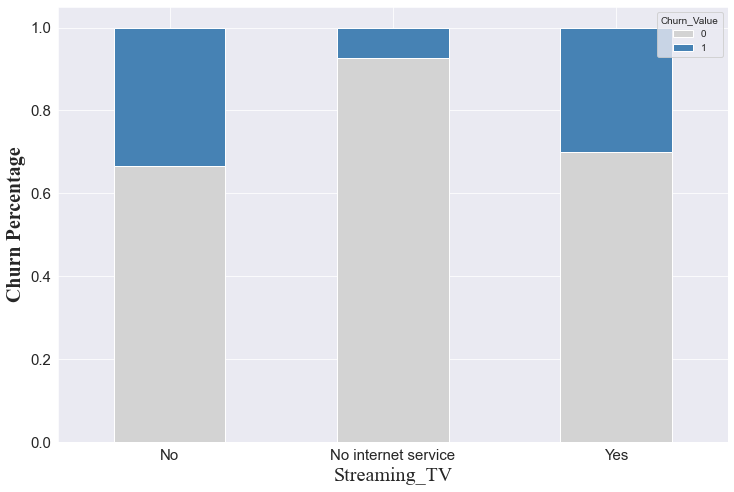

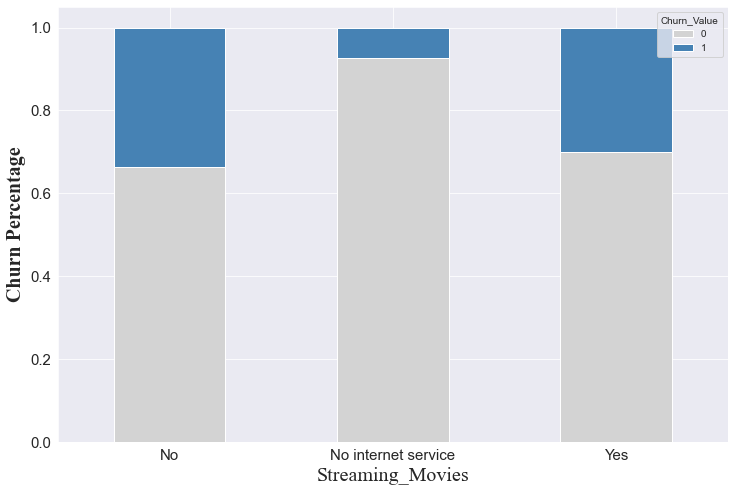

In [18]:
##Internet Service（YES）：Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies
stacked_plot(df, "Online_Security", "Churn_Value")
stacked_plot(df, "Online_Backup", "Churn_Value")
stacked_plot(df, "Device_Protection", "Churn_Value")
stacked_plot(df, "Tech_Support", "Churn_Value")
stacked_plot(df, "Streaming_TV", "Churn_Value")
stacked_plot(df, "Streaming_Movies", "Churn_Value")

结论：
- 有购买网络安全服务的用户更不容易流失
- 有购买在线备份服务的用户更不容易流失
- 有购买硬件保修服务的用户更不容易流失
- 有购买在线电视服务的用户更不容易流失
- 有购买在线电影服务的用户更不容易流失

总而言之，购买互联网附加服务的用户投入成本更大，也就更不容易流失

### Contract

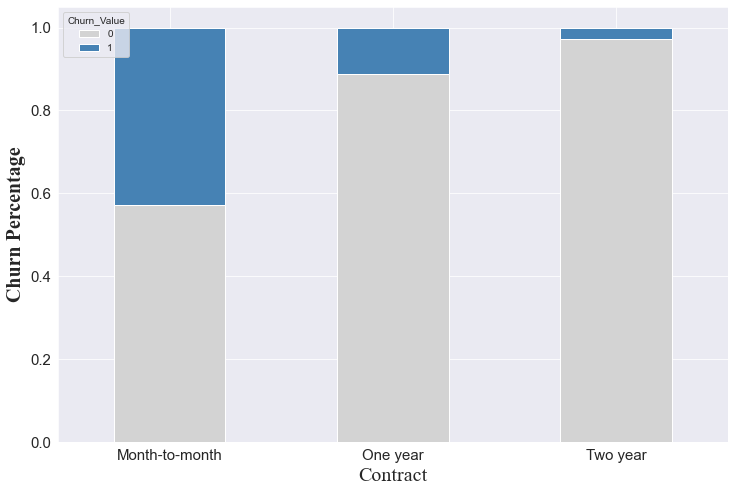

In [19]:
##Contract
stacked_plot(df, "Contract", "Churn_Value")

结论：
- 合同时间越长，客户越不容易流失

### Payment Method

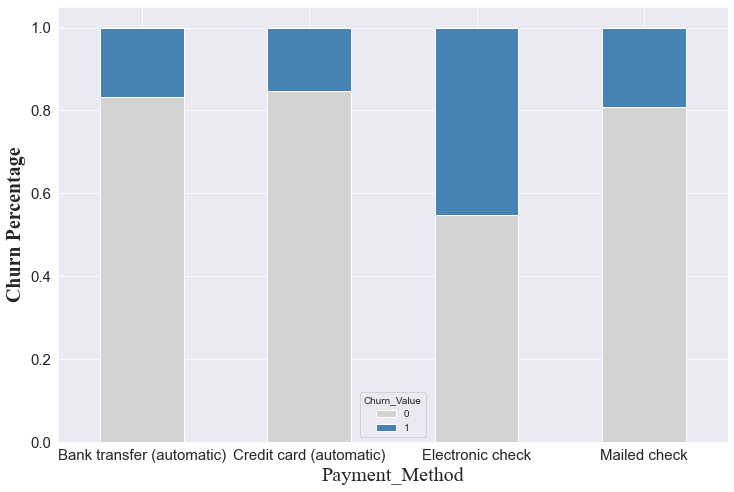

In [20]:
##Payment Method
stacked_plot(df, "Payment_Method", "Churn_Value")

<AxesSubplot:xlabel='Payment_Method', ylabel='count'>

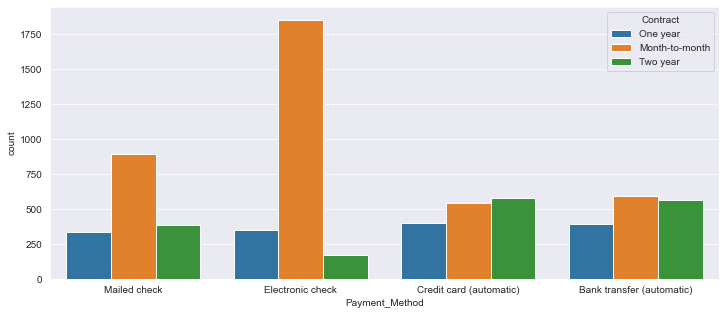

In [21]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x="Payment_Method", hue="Contract", data=df)

结论：
- 使用电子支票的用户更容易流失，原因是电子支票支付月付合同较多，支付两年期合同较少

### Paperless Billing

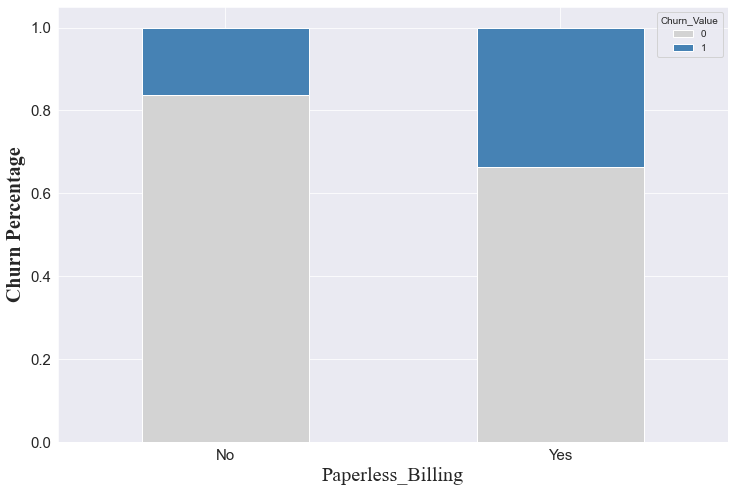

In [22]:
#Paperless Billing
stacked_plot(df, "Paperless_Billing", "Churn_Value")

结论：
- 电子账单会导致用户流失

## Total Charges

In [23]:
##Total Charges
Churn = df[df['Churn_Value']==1]
Not_Churn = df[df['Churn_Value']==0]

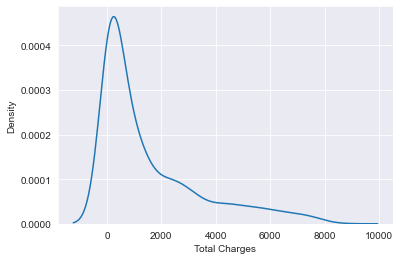

In [28]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["Total_Charges"],label = "Churn", ax= ax)
# sns.kdeplot(Not_Churn["Total_Charges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");

结论：
- 没有显著的差异

### Monthly Charges

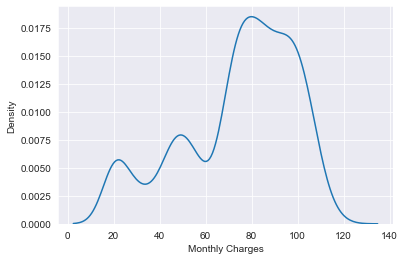

In [29]:
##Monthly Charges
fig, ax = plt.subplots()
sns.kdeplot(Churn["Monthly_Charges"],label = "Churn", ax= ax)
ax.set_xlabel("Monthly Charges");

结论：
- 月费越高的用户其流失率也就越高